In [1]:
#J(w,b) = 1/m S(i=1 do m)[L{a(i),y(i)}] #cost funkcija

#L{a(i),y(i)} = -[y(i)log(a(i))+(1-y(i))log(1-a(i))] #loss funkcija

#P(y|x)=a^y*(1-a)^(1-y) #uslovna verovatnoca (totalna verovatnoca)

#opadajuci gradijent za jedan uzorak
#dz= a-y
#dw= x*dz
#db= dz
#w:= w - a*dw, "dw"= dL{a,y}/dw= x*(a-y)
#b:= b - a*db, "db"= dL{a,y}/db= a-y

#opadajuci gradijent za m uzoraka (iterativno)
#dz(i)= a(i)-y(i)
#dw(i)= x(i)*dz(i)
#db(i)= dz(i)
#w(i):= w(i) - a(i)*dw(i), "dw(i)"= dL{a(i),y(i)}/dw= x(i)*(a(i)-y(i))
#b(i):= b(i) - a(i)*db(i), "db(i)"= dL{a(i),y(i)}/db= a(i)-y(i)

#opadajuci gradijent za m uzoraka (vektorski)
#dZ= A-Y
#dW= X*dZ
#db= dZ
#W:= W - A*dW
#b:= b - a*db 

In [2]:
#Opadajuci gradijent za m uzoraka (vektorski) z=w1x1+w2x2+b 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x1=np.vstack([(np.random.randn(1000)+2.4).T,(np.random.randn(1000)+2.4).T])
y1=np.zeros(1000)
x2=np.vstack([np.random.randn(1000).T,np.random.randn(1000).T])
y2=np.ones(1000)

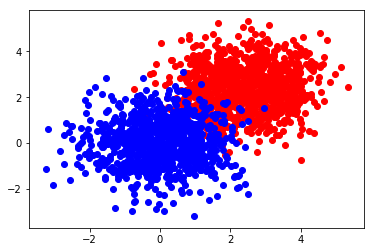

In [5]:
X=np.hstack([x1,x2]).T
Y=np.zeros(2000)
Y[1000:]=1
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.show()

In [6]:
def sig(z):
    return 1/(1+np.exp(-z))

In [7]:
Z= np.zeros(2000)
A= np.zeros(2000)#procena
W = np.zeros((2,1))
J=0
b=0
dZ=np.zeros(2000)
alf=0.01
iteracija=10000
m=len(X)

In [8]:
for j in range (0,iteracija):
    Z=np.dot(W.T,X.T)+b
    A=sig(Z)#racunanje procene
    dZ=A-Y
    dW=np.average(np.dot(X.T,dZ.T))
    db=np.average(dZ)
    W=W-np.dot(alf,dW)
    b=b-np.dot(alf,db)

In [9]:
x2=(0.5-b)/W[1]-W[0]/W[1]*X[:,0]

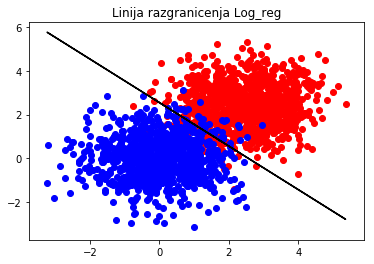

In [10]:
plt.plot(X[:,0],x2.T,c=u'k')
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.title("Linija razgranicenja Log_reg")
plt.show()

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
clf = LinearDiscriminantAnalysis()

In [13]:
klas_LDA = clf.fit(X,Y)

In [14]:
#parametri LDA klasifikatora
w11=klas_LDA.coef_[0,0]
w22=klas_LDA.coef_[0,1]
b11=klas_LDA.intercept_

In [15]:
#linija razgranicenja LDA klasifikatora
x3=(0.5-b11)/w22-w11/w22*X[:,0]

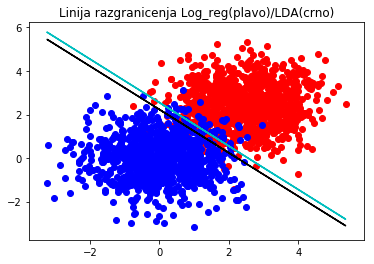

In [16]:
plt.plot(X[:,0],x3.T,c=u'k')#LDA
plt.plot(X[:,0],x2.T,c=u'c')#Log_reg_rucno_pisano
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.title("Linija razgranicenja Log_reg(plavo)/LDA(crno)")
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
klas_LR = LogisticRegression()

In [19]:
klas_LR.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
w111=klas_LR.coef_[0,0]
w222=klas_LR.coef_[0,1]
b111=klas_LR.intercept_

In [21]:
x4=(0.5-b11)/w22-w11/w22*X[:,0]

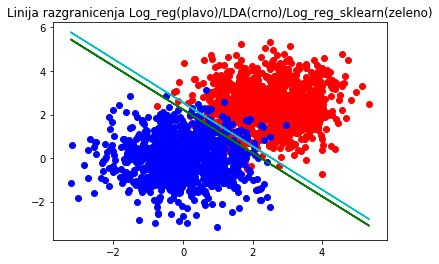

In [22]:
plt.plot(X[:,0],x3.T,c=u'k')#LDA
plt.plot(X[:,0],x2.T,c=u'c')#Log_reg_rucno_pisano
plt.plot(X[:,0],x4.T,c=u'g')#Log_reg_sklearn
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.title("Linija razgranicenja Log_reg(plavo)/LDA(crno)/Log_reg_sklearn(zeleno)")
plt.show()

In [23]:
#tacnost log_reg

In [24]:
def proceni_LR(X,W,b):
        procena = np.round(sig(np.dot(W.T,X.T)+b)) 
        return procena

In [25]:
#test skup
x11=np.vstack([(np.random.randn(1000)+2.4).T,(np.random.randn(1000)+2.4).T])
x22=np.vstack([np.random.randn(1000).T,np.random.randn(1000).T])

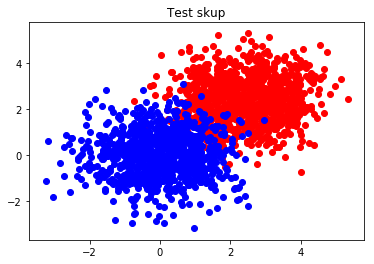

In [26]:
X_test=np.hstack([x11,x22]).T
y_test=np.zeros(2000)
y_test[1000:]=1
plt.title("Test skup")
plt.scatter(X[:1000,0],X[:1000,1],c=u'r')
plt.scatter(X[1000:,0],X[1000:,1],c=u'b')
plt.show()

In [27]:
y_procena = proceni_LR(X_test,W,b)
tacnost_LR_rucno=(y_procena==y_test).sum()/len(y_test)*100
print("Tacnost LR_rucno:",tacnost_LR_rucno,"%")

Tacnost LR_rucno: 95.05 %


In [28]:
y_procena_LDA = klas_LDA.predict(X_test)
tacnost_LDA = sum(y_procena_LDA==y_test)/len(y_test)*100
print("Tacnost LDA:",tacnost_LDA,"%")

Tacnost LDA: 95.75 %


In [29]:
y_procena_LR = klas_LR.predict(X_test)
tacnost_LR = sum(y_procena_LR==y_test)/len(y_test)*100
print("Tacnost LR_skelarn:",tacnost_LR,"%")

Tacnost LR_skelarn: 95.85000000000001 %


In [30]:
tacnost_LR_rucno-tacnost_LR

-0.8000000000000114

In [31]:
tacnost_LR_rucno-tacnost_LDA

-0.7000000000000028